In [3]:
import urllib2
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.special
import bokeh


In [4]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

fout=open("out.csv","a")
# first file:
for line in open("/home/vagrant/PAMAP2_Dataset/Protocol/subject101.dat"):
    fout.write(line)
# now the rest:    
for num in range(2,9):
    f = open("/home/vagrant/PAMAP2_Dataset/Protocol/subject10"+str(num)+".dat")
    f.next() # skip the header
    for line in f:
         fout.write(line)
    f.close() # not really needed
fout.close()

# Parsing Columns-Deleting non-wrist sensorial data

In [5]:
data=pd.read_csv('out.csv',delim_whitespace=True)

In [6]:
df=data.iloc[:,0:16]
df.columns=['Timestamp','ActivityID' ,'HR', 'temperature' ,'acceleration1','acceleration2','acceleration3', 'd1','d2','d3' ,'gyro1', 'gyro2' ,'gyro3',
'magn1','magn2','magn3']

#using 3d vectorisation for accelerometer, gyroscope and magnetometer
def fx(x, y,t):
    return np.sqrt(x**2 + y**2 + t**2)
df['acc_overall'] = np.vectorize(fx)(df['acceleration1'], df['acceleration2'],df['acceleration3'])
df['gyr_overall']= np.vectorize(fx)(df['gyro1'], df['gyro2'],df['gyro3'])
df['magn_overall']= np.vectorize(fx)(df['magn1'], df['magn2'],df['magn3'])

df.head()

,Timestamp,ActivityID,HR,temperature,acceleration1,acceleration2,acceleration3,d1,d2,d3,gyro1,gyro2,gyro3,magn1,magn2,magn3,acc_overall,gyr_overall,magn_overall
0,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047758,0.006474,14.8991,-69.2224,-5.82311,9.569074,0.054026,71.046692
1,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,9.602474,0.066867,71.148316
2,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,9.509862,0.033107,71.387703
3,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,9.831098,0.057699,70.836736
4,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,0.003238,0.012260,-0.054474,15.4565,-68.8180,-5.94087,9.789096,0.055930,70.782162


In [7]:
df.drop(df.columns[[4,5,6,7,8,9,10,11,12]], axis=1,inplace=True) 

df.head()

,Timestamp,ActivityID,HR,temperature,magn1,magn2,magn3,acc_overall,gyr_overall,magn_overall
0,8.39,0,NaN,30.0,14.8991,-69.2224,-5.82311,9.569074,0.054026,71.046692
1,8.40,0,NaN,30.0,14.2420,-69.5197,-5.12442,9.602474,0.066867,71.148316
2,8.41,0,NaN,30.0,14.8908,-69.5439,-6.17367,9.509862,0.033107,71.387703
3,8.42,0,NaN,30.0,15.5612,-68.8196,-6.28927,9.831098,0.057699,70.836736
4,8.43,0,NaN,30.0,15.4565,-68.8180,-5.94087,9.789096,0.055930,70.782162


Calculated the total vectors from the 

In [8]:
df.drop(df.columns[[4,5,6]],axis=1,inplace=True)

# Total Acceleration signals.

In [9]:
df.head()

,Timestamp,ActivityID,HR,temperature,acc_overall,gyr_overall,magn_overall
0,8.39,0,NaN,30.0,9.569074,0.054026,71.046692
1,8.40,0,NaN,30.0,9.602474,0.066867,71.148316
2,8.41,0,NaN,30.0,9.509862,0.033107,71.387703
3,8.42,0,NaN,30.0,9.831098,0.057699,70.836736
4,8.43,0,NaN,30.0,9.789096,0.055930,70.782162


In [52]:
df1 = df[df.ActivityID != 0]


(array([ 1702926.,  1010880.,  1058121.,        0.,   351648.,   314832.,
         1242129.,        0.,        0.,   128907.]),
 array([  1. ,   3.3,   5.6,   7.9,  10.2,  12.5,  14.8,  17.1,  19.4,
         21.7,  24. ]),
 <a list of 10 Patch objects>)

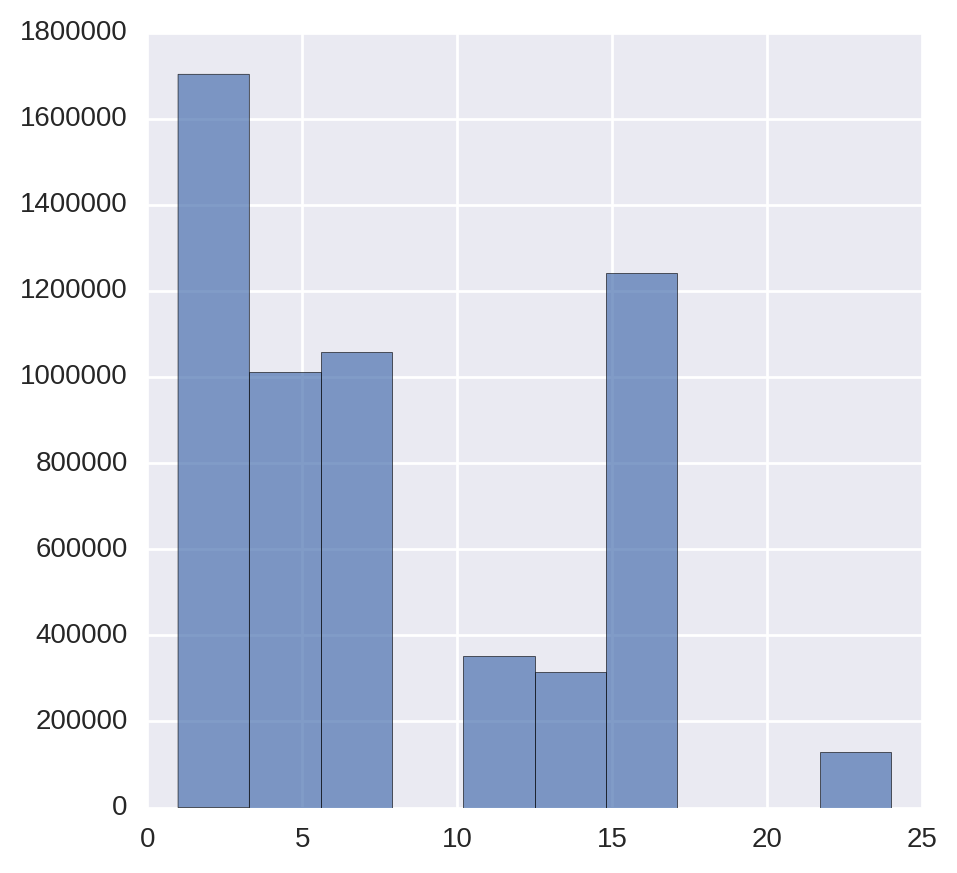

In [192]:
plt.hist(df1['ActivityID'],alpha =0.7)

In [65]:
for i in xrange(27):
    if len(df1[df1['ActivityID']==i])==0:
        print i

0
8
9
10
11
14
15
18
19
20
21
22
23
25
26


In [66]:
a0=df[df['ActivityID'] == 0]
a0.index = np.arange(1, len(a0) + 1)

a1=df1[df1['ActivityID'] == 1]
a1.index = np.arange(1, len(a1) + 1)
                     
a2=df1[df1['ActivityID'] == 2]
a2.index = np.arange(1, len(a2) + 1)
                     
a3=df1[df1['ActivityID'] == 3]
a3.index = np.arange(1, len(a3) + 1)
                     
a4=df1[df1['ActivityID'] == 4]
a4.index = np.arange(1, len(a4) + 1)

a5=df1[df1['ActivityID'] == 5]
a5.index = np.arange(1, len(a5) + 1)

a6=df1[df1['ActivityID'] == 6]
a6.index = np.arange(1, len(a6) + 1)
                     
a7=df1[df1['ActivityID'] == 7]
a7.index = np.arange(1, len(a7) + 1)

a8=df1[df1['ActivityID'] == 12]
a8.index = np.arange(1, len(a8) + 1)
                     
a9=df1[df1['ActivityID'] == 13]
a9.index = np.arange(1, len(a9) + 1)
                     
a10=df1[df1['ActivityID'] == 16]
a10.index = np.arange(1, len(a10) + 1)
                     
a11=df1[df1['ActivityID'] == 17]
a11.index = np.arange(1, len(a11) + 1)
                     
a12=df1[df1['ActivityID'] == 24]
a12.index = np.arange(1, len(a12) + 1)

# Information Compression with Feature combination 3D axis length calculation

# Exploratory Analysis
Accelerometer Distribution per Class

In [185]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5


# Examples of Gyroscope Distributions

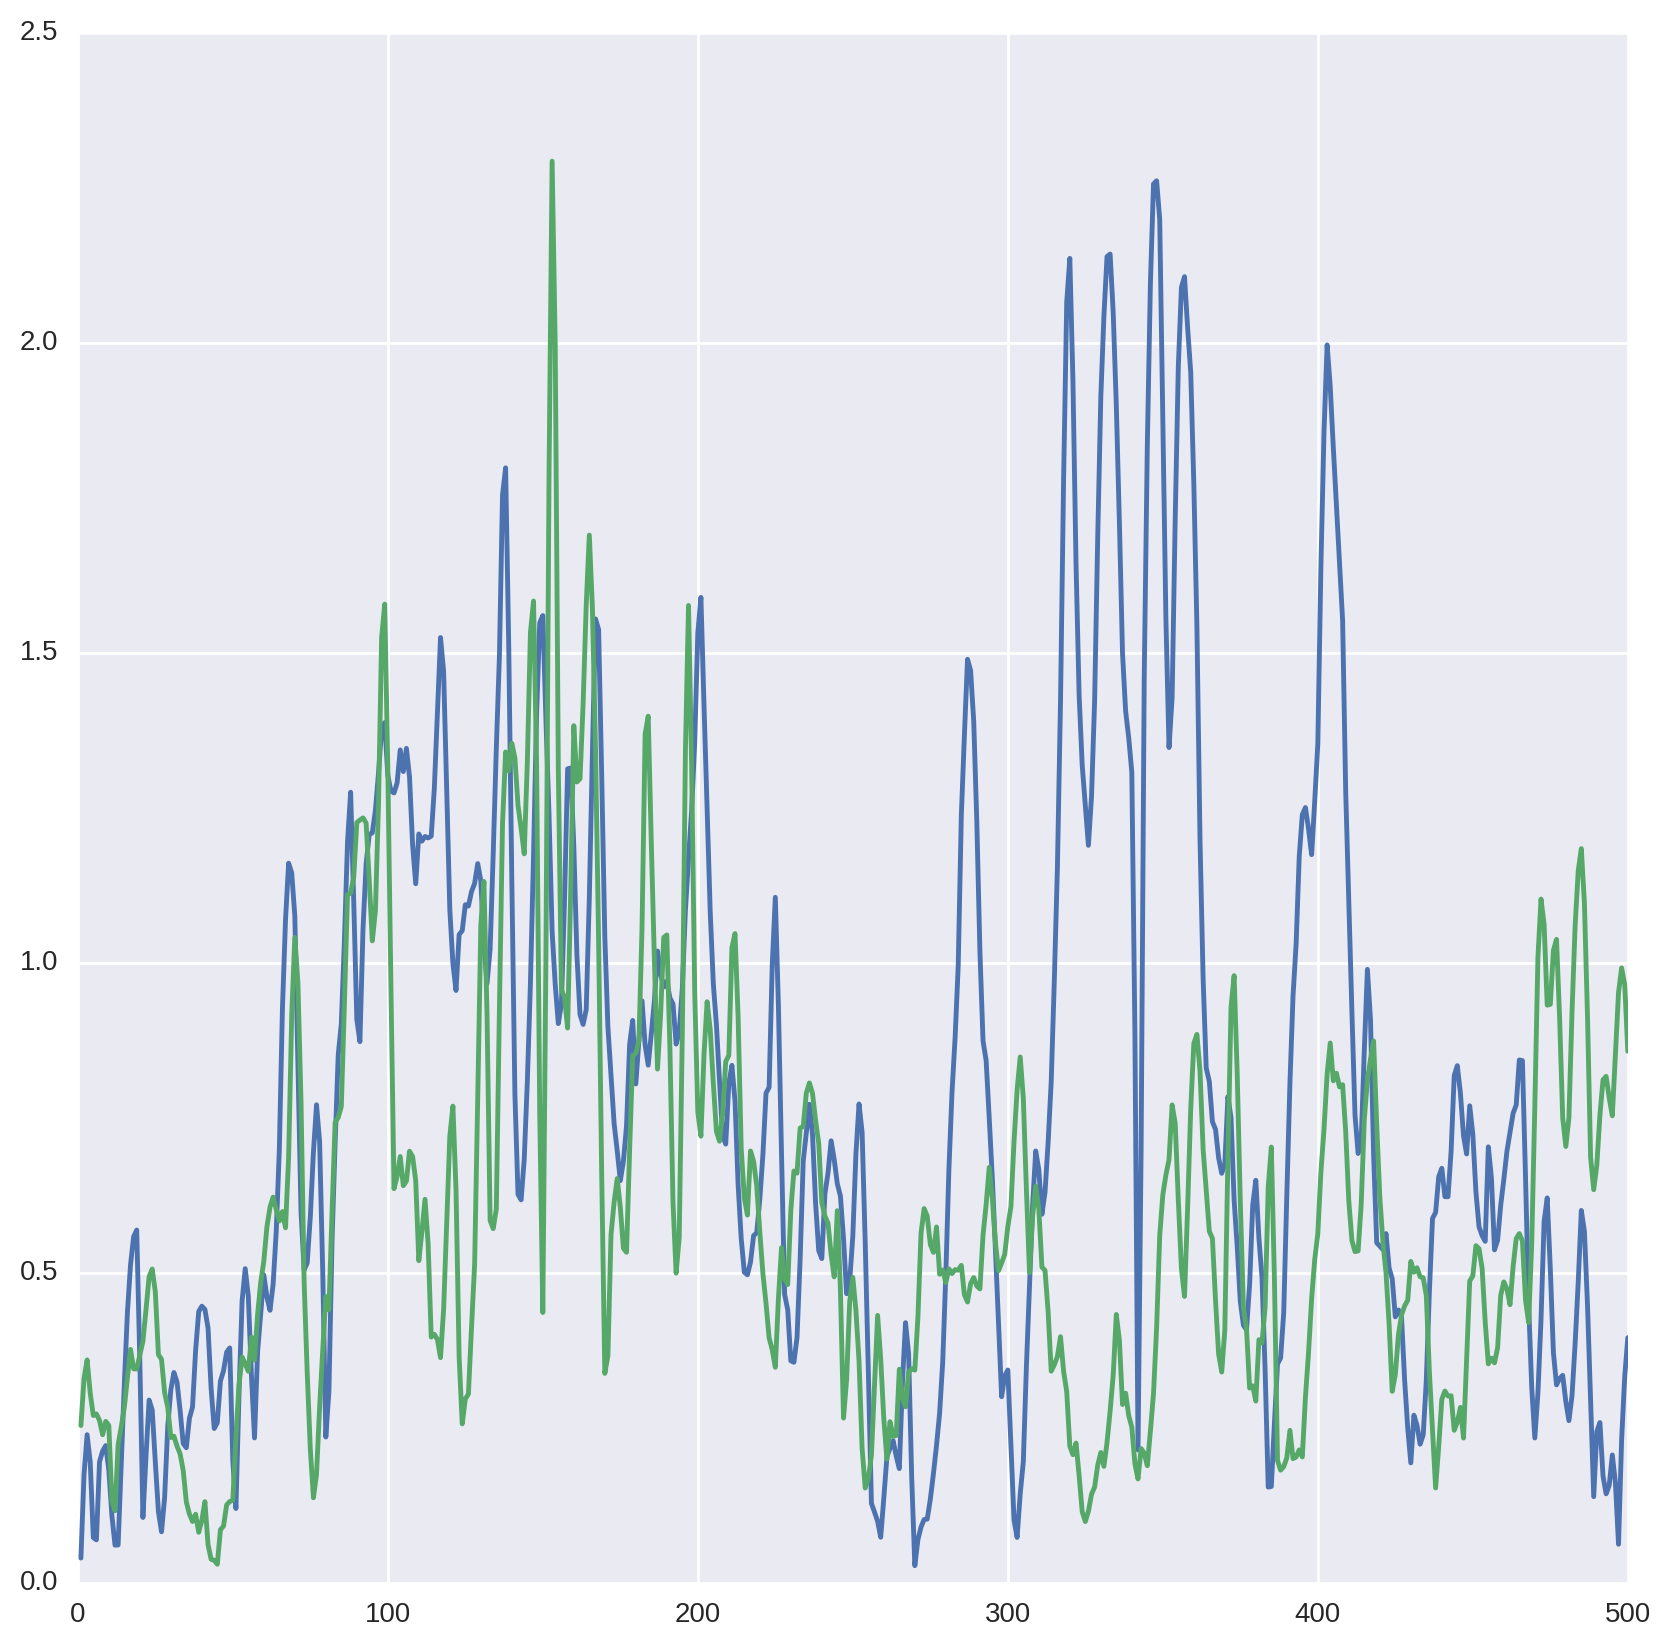

In [75]:

plt.plot(a1['gyr_overall'][0:500])
plt.plot(a7['gyr_overall'][0:500])


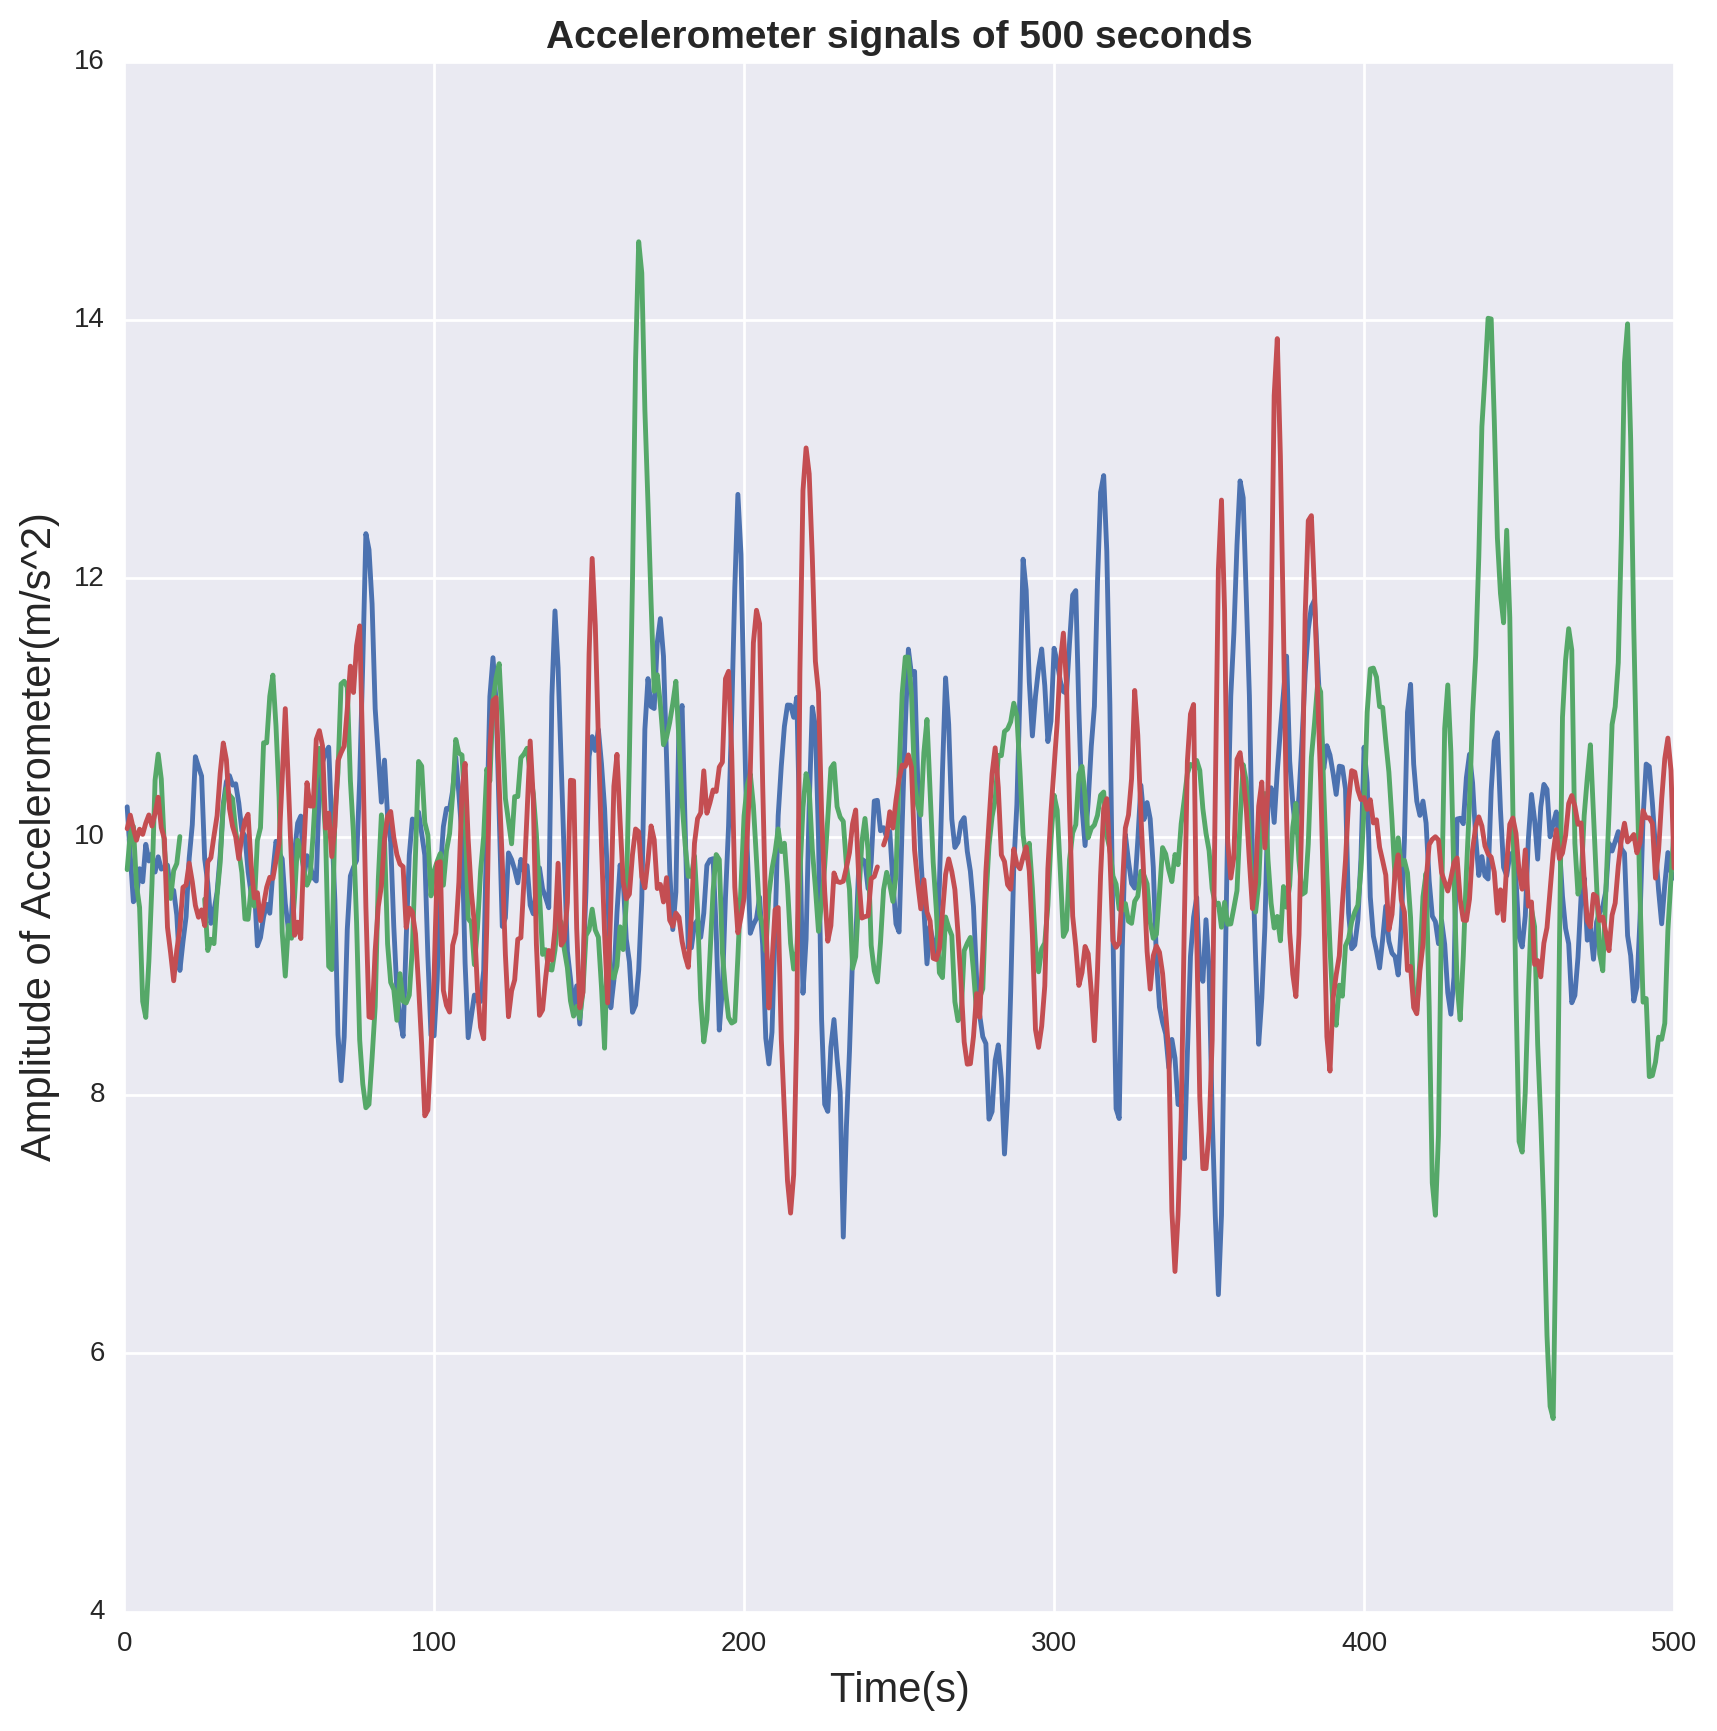

In [77]:

p2=plt.plot(a1['acc_overall'][0:500])
p2=plt.plot(a5['acc_overall'][0:500])
p2=plt.plot(a10['acc_overall'][0:500])
p2=plt.plot(df1['acc_overall'].mean())
p2=plt.ylabel('Amplitude of Accelerometer(m/s^2)',fontsize=15)
p2=plt.xlabel('Time(s)',fontsize=15)
p2=plt.title('Accelerometer signals of 500 seconds',fontsize=14, fontweight='bold')
p2=plt.show()




In [80]:
df['ActivityID'].value_counts()

0     2782703
4      716283
17     716070
1      577569
3      569793
7      564321
2      555564
16     526059
6      493800
12     351648
13     314832
5      294597
24     128907
Name: ActivityID, dtype: int64

In [ ]:
x=a1['acc_overall']

In [ ]:
k=a1['acc_overall']
fs=100
f, Pwelch_spec = signal.welch(k.dropna(), fs, scaling='spectrum')

k2=a2['acc_overall']
f2, Pwelch_spec = signal.welch(k2.dropna(), fs, scaling='spectrum')


plt.plot(f, Pwelch_spec,linewidth=3)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

# Fourier Analysis

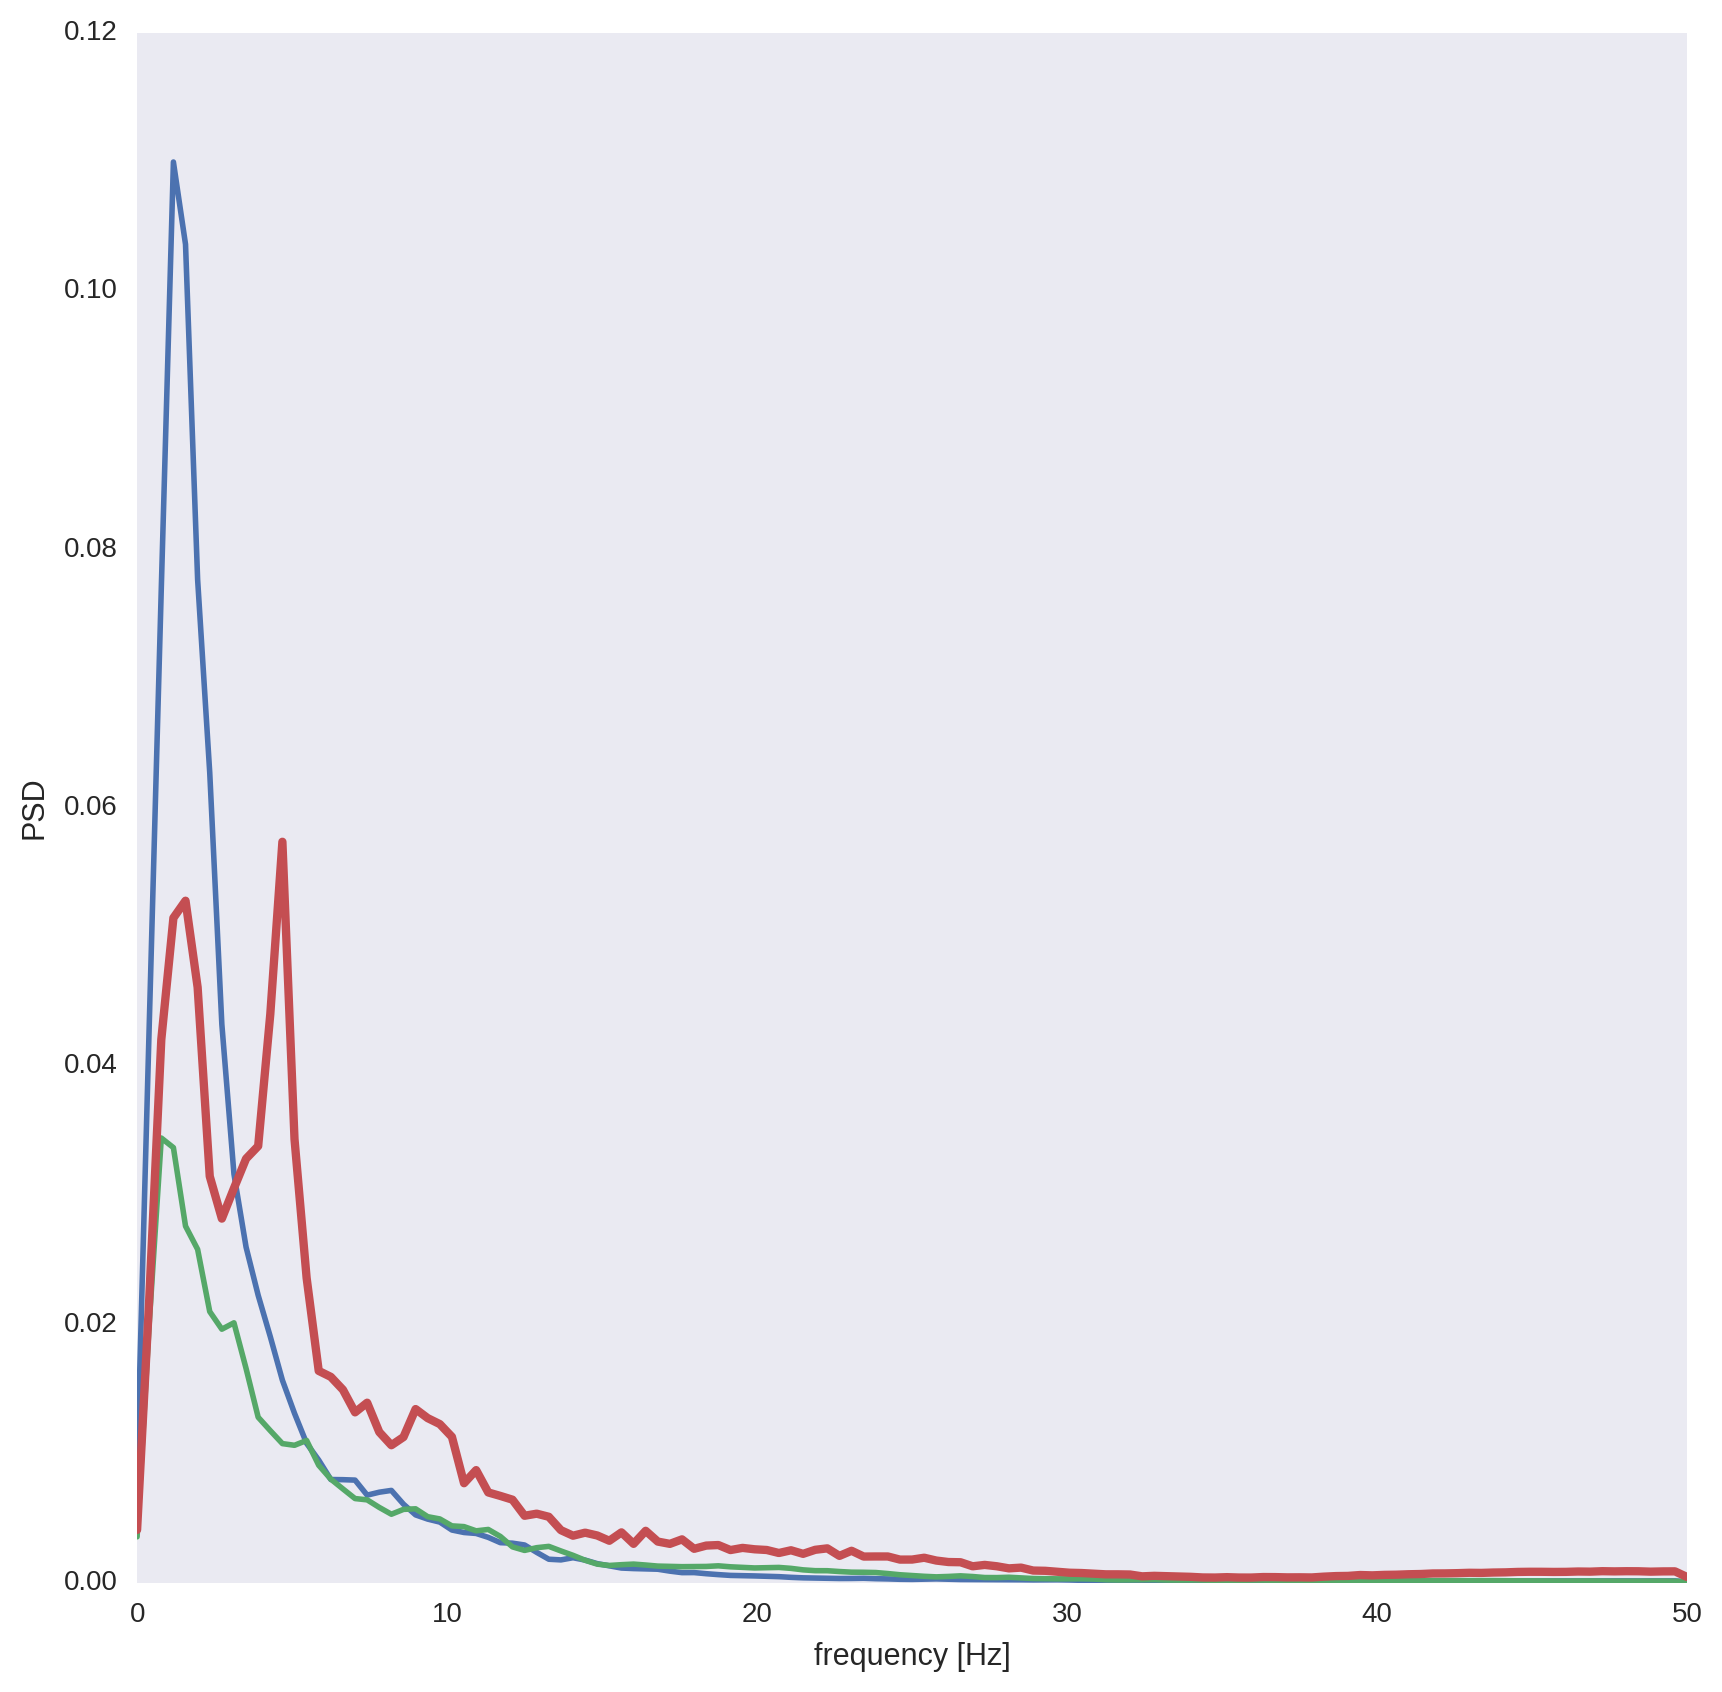

In [84]:
k=a1['acc_overall']
fs=100
f, Pwelch_spec = signal.welch(k.dropna(), fs, scaling='spectrum')

k2=a2['acc_overall']
f2, Pwelch_spec2 = signal.welch(k2.dropna(), fs, scaling='spectrum')


k3=a3['acc_overall']
f3, Pwelch_spec3 = signal.welch(k3.dropna(), fs, scaling='spectrum')
plt.plot(f3, Pwelch_spec3,linewidth=2)

plt.plot(f, Pwelch_spec,linewidth=2)
plt.plot(f2, Pwelch_spec2,linewidth=3)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

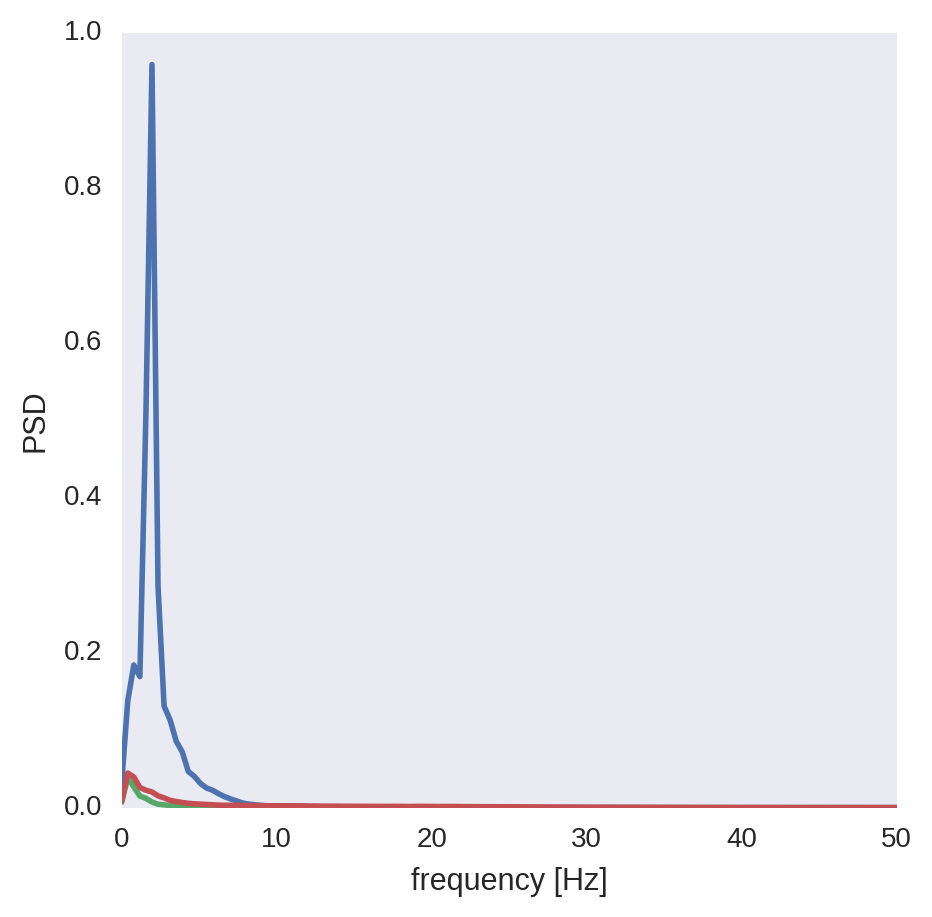

In [193]:
k=a1['gyr_overall']
fs=100
f, Pwelch_spec = signal.welch(k.dropna(), fs, scaling='spectrum')

k2=a6['gyr_overall']
f2, Pwelch_spec2 = signal.welch(k2.dropna(), fs, scaling='spectrum')


k3=a4['gyr_overall']
f3, Pwelch_spec3 = signal.welch(k3.dropna(), fs, scaling='spectrum')
plt.plot(f3, Pwelch_spec3,linewidth=2)

plt.plot(f, Pwelch_spec,linewidth=2)
plt.plot(f2, Pwelch_spec2,linewidth=2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

In [87]:
b=[a1,a2,a3,a4,a5,a6,a7,a8,a10,a11,a12]

In [88]:
fs=100

In [89]:
trainacc1={}
trainacc2={}
trainacc3={}
trainacc4={}
trainacc5={}
trainacc6={}
trainacc7={}
train8={}
train9={}
train10={}
train11={}
train12={}
train13={}
train14={}
train15={}
train16={}
classid={}

array([  1.171875,  35.15625 ,  40.625   ,  43.75    ,  48.4375  ])

In [ ]:
for i in range(0,10):
    temp=b[i]['gyr_overall']
    for j in range(len(b[i])/10000):
        window=10000
        f, Pwelch_spec = signal.welch(temp[1+j*window:window+j*window].dropna(), fs, scaling='spectrum')
        temp4=signal.find_peaks_cwt(Pwelch_spec,np.arange(1,10))
        print temp4

In [211]:
for i in range(0,10):
    temp=b[i]['gyr_overall']
    for j in range(len(b[i])/10000):
        window=10000
        f, Pwelch_spec = signal.welch(temp[1+j*window:window+j*window].dropna(), fs, scaling='spectrum')
        temp4=signal.find_peaks_cwt(Pwelch_spec,np.arange(1,10))
        train14[i*len(b[i])/10000+j]=temp4
        trainacc5[i*len(b[i])/10000+j]=f[temp4]
        trainacc6[i*len(b[i])/10000+j]=Pwelch_spec.std()
        temp2=np.mean(temp[1+j*window:window+j*window].dropna())
        train8[i*len(b[i])/10000+j]=temp2
        temp2=np.std(temp[1+j*window:window+j*window].dropna())
        train9[i*len(b[i])/10000+j]=temp2
        classid[i*len(b[i])/10000+j]=i
        
        


In [212]:
for i in range(0,10):
    temp=b[i]['acc_overall']
    for j in range(len(b[i])/10000):
        window=10000
        f, Pwelch_spec = signal.welch(temp[1+j*window:window+j*window].dropna(), fs, scaling='spectrum')
        temp4=signal.find_peaks_cwt(Pwelch_spec,np.arange(1,10))
        train15[i*len(b[i])/10000+j]=temp4
        trainacc1[i*len(b[i])/10000+j]=f[temp4]
        trainacc2[i*len(b[i])/10000+j]=Pwelch_spec.std()
        temp2=np.mean(temp[1+j*window:window+j*window].dropna())
        train10[i*len(b[i])/10000+j]=temp2
        temp2=np.std(temp[1+j*window:window+j*window].dropna())
        train11[i*len(b[i])/10000+j]=temp2



In [213]:
for i in range(0,10):
    temp=b[i]['magn_overall']
    for j in range(len(b[i])/10000):
        window=10000
        f, Pwelch_spec = signal.welch(temp[1+j*window:window+j*window].dropna(), fs, scaling='spectrum')
        temp4=signal.find_peaks_cwt(Pwelch_spec,np.arange(1,10))
        train16[i*len(b[i])/10000+j]=temp4
        trainacc3[i*len(b[i])/10000+j]=f[temp4]
        trainacc4[i*len(b[i])/10000+j]=Pwelch_spec.std()
        temp2=np.mean(temp[1+j*window:window+j*window].dropna())
        train12[i*len(b[i])/10000+j]=temp2
        temp2=np.std(temp[1+j*window:window+j*window].dropna())
        train13[i*len(b[i])/10000+j]=temp2


In [214]:
a=[trainacc1,trainacc2,trainacc3,trainacc4,trainacc5,trainacc6,train8,train9,train10,train11,train12,train13,train14,train15,train16,classid]

In [215]:
x=pd.DataFrame(a)
x=x.transpose()
x.index= np.arange(1, len(x) + 1)

In [216]:
x['magn_topfr']=pd.Series()
x['acc_position_of_1_peak']=pd.Series()
x['acc_position_of_2_peak']=pd.Series()
x['magn_position_of_1_peak']=pd.Series()
x['magn_position_of_2_peak']=pd.Series()
x['gyr_position_of_1_peak']=pd.Series()
x['gyr_position_of_2_peak']=pd.Series()

x['magn_topfr2']=pd.Series()
x['acc_topfr']=pd.Series()
x['acc_topfr2']=pd.Series()
x['gyr_topfr']=pd.Series()
x['gyr_topfr2']=pd.Series()

In [225]:
 for i in range(1,len(x)+1):
    x['acc_topfr'][i]=x.iloc[:,0][i][0]
    x['acc_topfr2'][i]=x.iloc[:,0][i][1]
    x['gyr_topfr'][i]=x.iloc[:,2][i][0]
    x['gyr_topfr2'][i]=x.iloc[:,2][i][1]    
    x['magn_topfr'][i]=x.iloc[:,4][i][0]
    x['magn_topfr2'][i]=x.iloc[:,4][i][1]
    x['acc_topfr'][i]=x.iloc[:,0][i][0]
    x['acc_position_of_1_peak']=x.iloc[:,13][i][0]
    x['acc_position_of_2_peak']=x.iloc[:,13][i][1]
    x['magn_position_of_1_peak']=x.iloc[:,14][i][0]
    x['magn_position_of_2_peak']=x.iloc[:,14][i][1]
    x['gyr_position_of_1_peak']=x.iloc[:,12][i][0]
    x['gyr_position_of_2_peak']=x.iloc[:,12][i][1]





/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value 

In [226]:
x.drop(x.columns[[0,2,4,12,13,14]], axis=1,inplace=True) 
x.head()

,1,3,5,6,7,8,9,10,11,15,...,acc_position_of_2_peak,magn_position_of_1_peak,magn_position_of_2_peak,gyr_position_of_1_peak,gyr_position_of_2_peak,magn_topfr2,acc_topfr,acc_topfr2,gyr_topfr,gyr_topfr2
1,0.00575763,0.060013,0.00708512,0.193674,0.503983,9.80778,0.431432,59.2671,4.96927,0,...,51,2,26,3,90,14.453125,1.562500,11.718750,0.781250,12.890625
2,0.00438556,0.0639467,0.00600201,0.1977,0.498375,9.82515,0.459874,59.8276,3.70169,0,...,51,2,26,3,90,29.296875,2.734375,11.328125,0.781250,14.062500
3,0.0131092,0.17787,0.0118539,0.28327,0.805465,9.77665,0.749789,56.5323,7.29882,0,...,51,2,26,3,90,29.687500,2.343750,12.890625,0.781250,17.187500
4,0.000288111,0.000222867,0.0004686,0.0646513,0.110144,9.67666,0.138559,45.5453,0.375637,0,...,51,2,26,3,90,14.062500,0.781250,5.078125,1.171875,9.375000
5,0.00513492,0.00329539,0.00356786,0.0937383,0.405498,9.65545,0.461654,45.2612,0.435729,0,...,51,2,26,3,90,42.187500,1.953125,5.078125,0.781250,8.984375


In [269]:
x.drop(x.columns[9],axis=1,inplace=True)

In [42]:
rand.to_csv('data')

In [43]:
labels.to_csv('Classes')

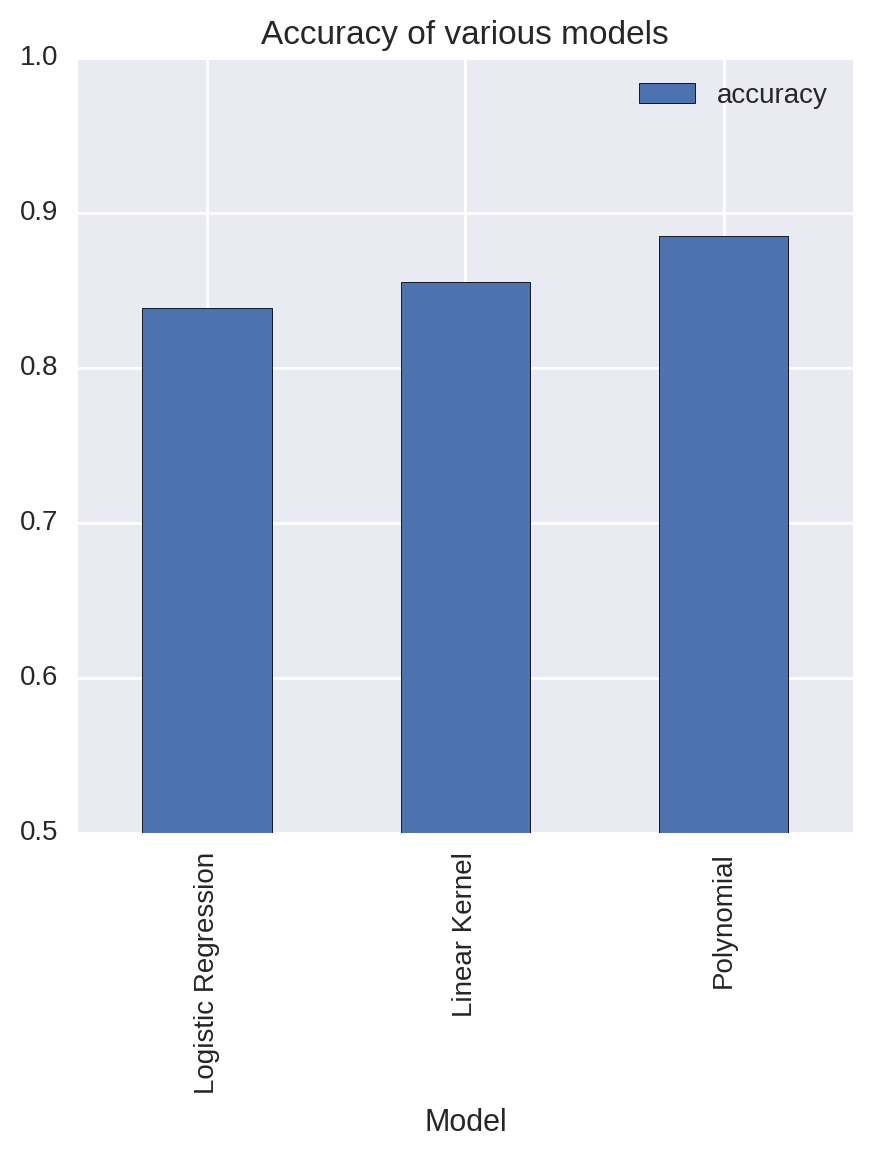

In [298]:
from sklearn import linear_model, cross_validation, metrics, random_projection
import pandas as pd

cv = cross_validation.ShuffleSplit(len(y), n_iter=10, test_size=0.3, random_state=42)
C = 2.0

models = [
    ("Logistic Regression", linear_model.LogisticRegression()),
    ("Linear Kernel", svm.SVC(kernel='linear', C=C)),
    ("Polynomial", svm.SVC(kernel='poly', degree=2))
]

pd.DataFrame([
    (name, cross_validation.cross_val_score(clf, x, y, scoring='accuracy', cv=cv).mean()) for name, clf in models
], columns=["Model", "accuracy"]).plot(x="Model", y="accuracy", kind="bar", title="Accuracy of various models", ylim=[.5,1.])

In [319]:
a=pd.DataFrame([
    (name, clf.fit(x,y).predict(x)) for name, clf in models
    ])

In [333]:
a=cross_validation.cross_val_predict(clf, x, y, cv=10)

In [334]:
metrics.confusion_matrix(a,y)

array([[46,  5,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 6, 47,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  3, 18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 56,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 31,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 48,  3],
       [ 0,  0,  1,  0,  0,  2,  0,  0,  2, 68]])

(array([ 55.,  55.,  27.,  32.,  29.,  14.,  56.,  35.,  52.,  71.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

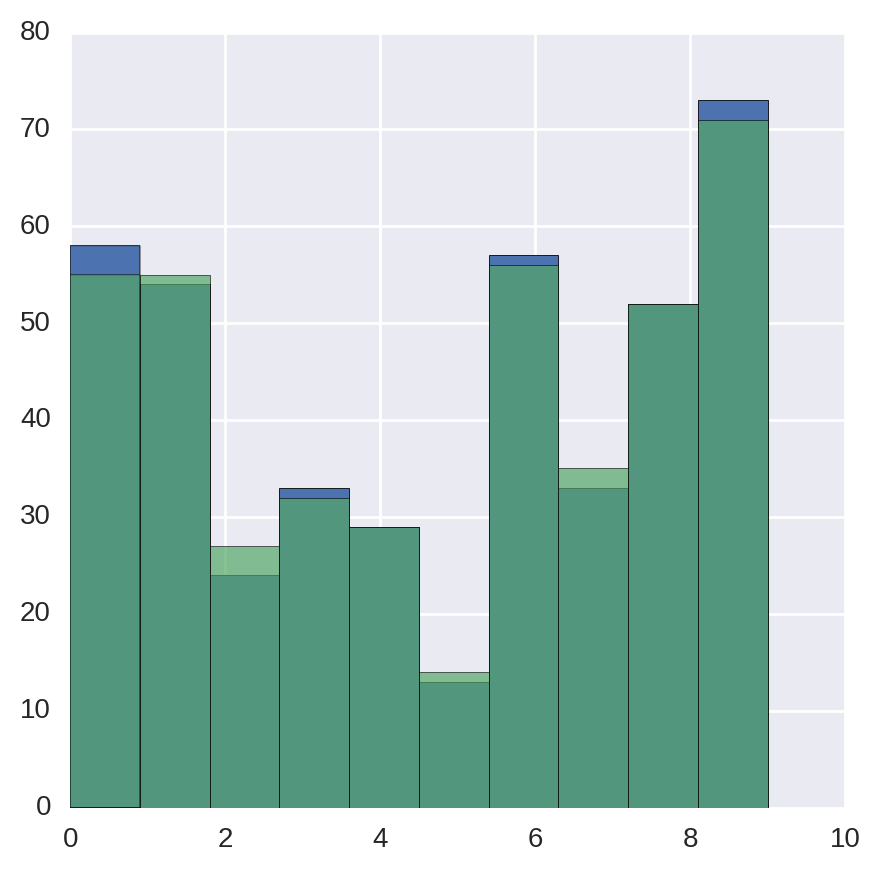

In [337]:
plt.hist(a)
plt.hist(y,alpha=0.7)

In [ ]:
4      716283
17     716070
1      577569
3      569793
7      564321
2      555564
16     526059
6      493800
12     351648
13     314832
5      294597
24     128907

In [360]:
classes=['Walking','Ironing','lying','standing','sitting','vacuum cleaning','cycling','ascending stairs','running','rope jumping']
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(a, y)
np.set_printoptions(precision=2)






Normalized confusion matrix
[[ 0.79  0.09  0.12  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.11  0.87  0.02  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.12  0.12  0.75  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.94  0.    0.    0.    0.06  0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.92  0.    0.    0.08  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.98  0.02  0.    0.  ]
 [ 0.    0.    0.    0.03  0.    0.    0.    0.94  0.03  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.02  0.92  0.06]
 [ 0.    0.    0.01  0.    0.    0.03  0.    0.    0.03  0.93]]


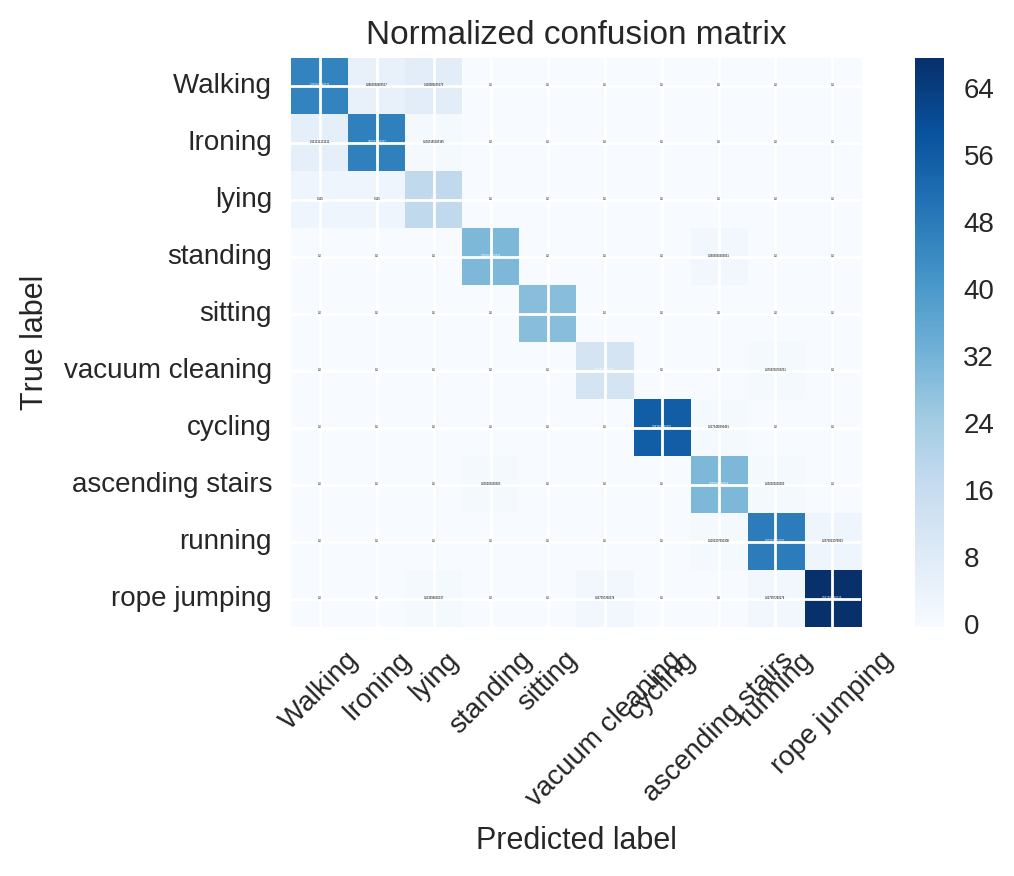

In [361]:
# Plot normalized confusion matrix
matplotlib.rcParams.update({'font.size': 1})
plt.figure(figsize=(6, 4))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


Confusion matrix, without normalization
[[46  5  7  0  0  0  0  0  0  0]
 [ 6 47  1  0  0  0  0  0  0  0]
 [ 3  3 18  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  2  0  0]
 [ 0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  1  0]
 [ 0  0  0  0  0  0 56  1  0  0]
 [ 0  0  0  1  0  0  0 31  1  0]
 [ 0  0  0  0  0  0  0  1 48  3]
 [ 0  0  1  0  0  2  0  0  2 68]]


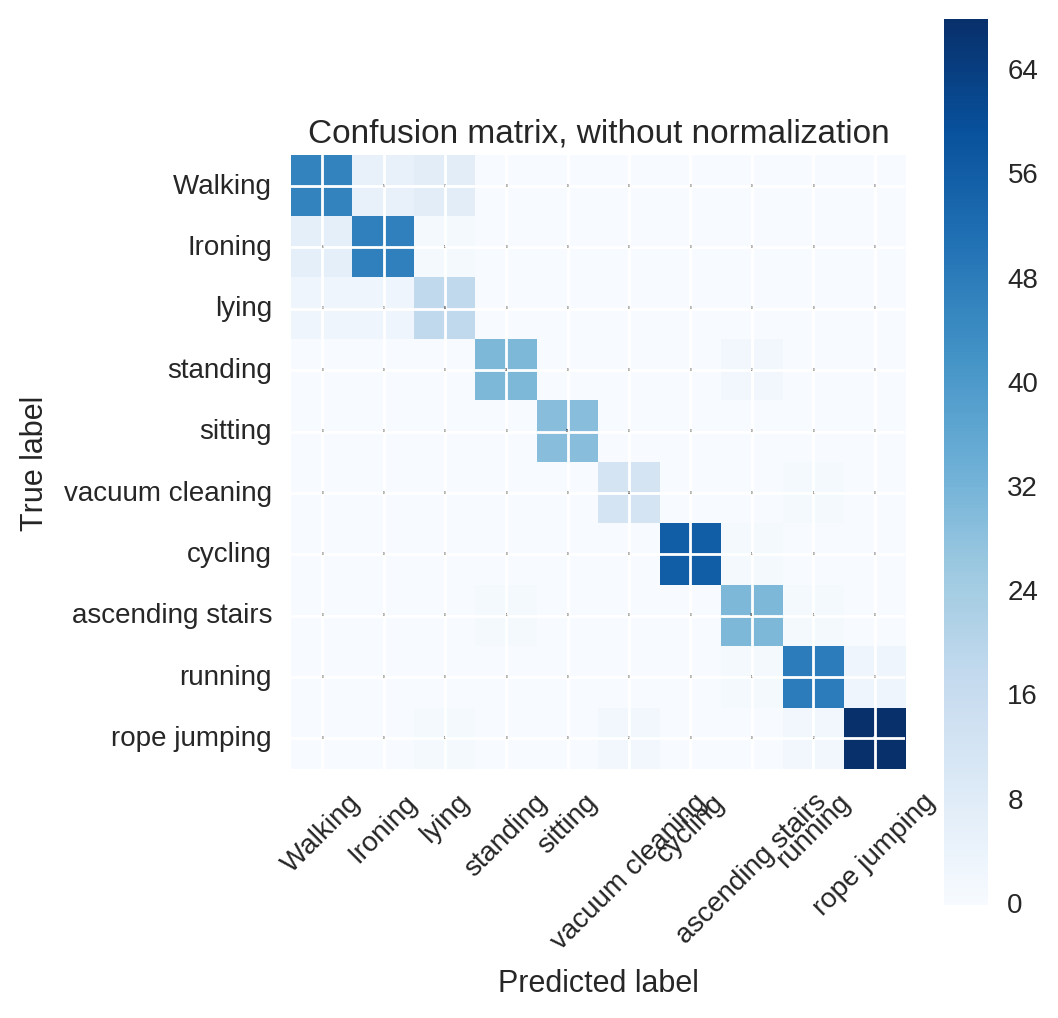

In [362]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')
plt.show()